In [3]:
%matplotlib inline
import numpy
import math
import matplotlib.pyplot as plt

In [4]:
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [5]:
print("left")
Pleft=100*1000
uleft=0
Y=1.4
rholeft=1
eleft=Pleft/((Y-1)*rholeft)
print(eleft)
u3L=rholeft*(eleft+0.5*uleft**2)
print(u3L)

print("right")
P=10*1000
u=0
Y=1.4
rho=0.125
eright=P/((Y-1)*rho)
u3R=rho*(eright+0.5*u**2)
print(u3R)

left
250000.00000000006
250000.00000000006
right
25000.000000000007


In [6]:
def u1_initial(nx):    
    u1=numpy.ones(nx)*0.125        
    u1[0:2/4*(nx-1)+1]=1  
    
    return u1

def u2_initial(nx):    
    u2=numpy.zeros(nx)    
    return u2

def u3_initial(nx):    
    u3=numpy.ones(nx)*u3R      
    
    u3[0:2/4*(nx-1)+1]=u3L
    return u3
    

In [7]:
nx = 81
#dx = .25
#dt = .0002   
#Y = 1.4
#nt = 100


/home/longteng09/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()


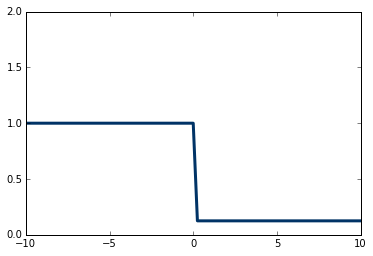

In [8]:
u1 = u1_initial(nx).copy()
x = numpy.linspace(-10,10,nx)
#print(u1)
#print(x)
plt.plot(x, u1, color='#003366', ls='-', lw=3)
plt.ylim(0,2);


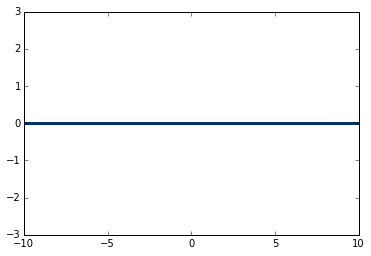

In [9]:
u2 = u2_initial(nx).copy()
x = numpy.linspace(-10,10,nx)
#print(u2)
#print(x)
plt.plot(x, u2, color='#003366', ls='-', lw=3)
plt.ylim(-3,3);


/home/longteng09/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:14: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


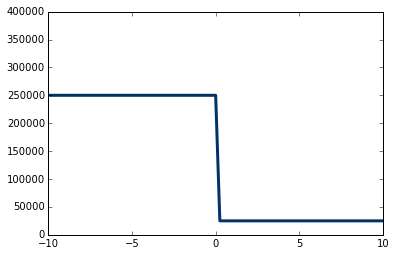

In [10]:
u3 = u3_initial(nx).copy()
x = numpy.linspace(-10,10,nx)
#print(u3)
#print(x)
plt.plot(x, u3, color='#003366', ls='-', lw=3)
plt.ylim(0,400000);

In [11]:
#computeF1 = lambda u2: u2
#computeF2 = lambda u1 u2 u3 Y: (u2**2/u1)+(Y-1)*(u3-0.5*(u2**2)/u1)
#computeF3 = lambda u1 u2 u3 Y: (u3+(Y-1)*(u3-0.5*(u2**2)/u1))*u2/u1

In [12]:
#def computeF1(u2):
#    return u2

#def computeF2(u1,u2,u3):
#    Y=1.4
#    return (u2**2/u1)+(Y-1)*(u3-0.5*(u2**2)/u1)

#def computeF3(u1,u2,u3):
#    Y=1.4
#    return (u3+(Y-1)*(u3-0.5*(u2**2)/u1))*u2/u1

In [13]:
def computeF1(u1,u2,u3):    
    length=len(u1)
    result=numpy.zeros(length)
    for i in range(length):   

        result[i]=u2[i]             
     
    return result

In [14]:
def computeF2(u1,u2,u3):    
    length=len(u1)
    result=numpy.zeros(length)
    Y=1.4
    for i in range(length):   

        result[i]=(u2[i]**2/u1[i])+(Y-1)*(u3[i]-0.5*(u2[i]**2)/u1[i])            
     
    return result

In [15]:
def computeF3(u1,u2,u3):    
    length=len(u1)
    result=numpy.zeros(length)
    Y=1.4
    for i in range(length):   

        result[i]=(u3[i]+(Y-1)*(u3[i]-0.5*(u2[i]**2)/u1[i]))*u2[i]/u1[i]            
        
    return result

In [16]:
#print(computeF1(u1,u2,u3))
#print(computeF2(u1,u2,u3))
#print(computeF3(u1,u2,u3))
nx = 81
dx = 0.25
dt = 0.0002   
Y = 1.4
nt=0.01/dt
print(nt)
nt=nt+1

50.0


In [17]:
def mainfunction(u1,u2,u3,nt, dt, dx):
    
    un1 = numpy.zeros((nt,len(u1)))
    un2 = numpy.zeros((nt,len(u2)))
    un3 = numpy.zeros((nt,len(u3)))
    
    un1[:] = u1.copy()
    un2[:] = u2.copy()
    un3[:] = u3.copy()
    
    u1_star = u1.copy()
    u2_star = u2.copy()
    u3_star = u3.copy()
    
    for i in range(1,int(nt)):        
        F1 = computeF1(u1,u2,u3)
        F2 = computeF2(u1,u2,u3)
        F3 = computeF3(u1,u2,u3)    
       
        u1_star[:-1] = 0.5*(u1[1: ] +u1[:-1])- dt/(2*dx) * (F1[1:]-F1[:-1])
        u2_star[:-1] = 0.5*(u2[1: ] +u2[:-1])- dt/(2*dx) * (F2[1:]-F2[:-1])
        u3_star[:-1] = 0.5*(u3[1: ] +u3[:-1])- dt/(2*dx) * (F3[1:]-F3[:-1])
            
        F1_star = computeF1(u1_star, u2_star, u3_star)
        F2_star = computeF2(u1_star, u2_star, u3_star)
        F3_star = computeF3(u1_star, u2_star, u3_star) 
            
        un1[i,1:-1] = u1[1 :-1]-dt/dx*(F1_star[1:-1]-F1_star[0 :-2])
        un2[i,1:-1] = u2[1 :-1]-dt/dx*(F2_star[1:-1]-F2_star[0 :-2])
        un3[i,1:-1] = u3[1 :-1]-dt/dx*(F3_star[1:-1]-F3_star[0 :-2])     
        
        u1 = un1[i].copy()
        u2 = un2[i].copy()
        u3 = un3[i].copy()
   
    return un1, un2, un3

a=mainfunction(u1,u2,u3,nt,dt,dx)

/home/longteng09/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:3: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  app.launch_new_instance()
/home/longteng09/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:4: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/longteng09/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:5: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [18]:
steps=(10+2.5)/(20/81)
steps=int(steps)
print(steps)

50


In [19]:
12.5/dx

50.0

In [22]:
print(a[1])
vel=a[1]/a[0]

print(vel)
timevel=vel[-1,steps+1]
print(timevel)



[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
292.611471527


[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.74622983e-13   2.23517418e-12   2.36672349e-11
   2.28593126e-10   2.01009680e-09   1.61230564e-08   1.18160562e-07
   7.92167233e-07   4.86199237e-06   2.73285225e-05   1.40665389e-04
   6.62670131e-04   2.85433060e-03   1.12236369e-02   4.02024374e-02
   1.30818748e-01   3.85453348e-01   1.02495092e+00   2.45273533e+00
   5.27715406e+00   1.02257427e+01   1.79453556e+01   2.87635781e+01
   4.25973831e+01   5.89879603e+01   7.73383652e+01   9.70564038e+01
   1.17710083e+02   1.38916242e+02   1.60667796e+02   1.82592024e+02
   2.04853448e+02   2.27455686e+02   2.49367101e+02   2.72033309e+02
   2.88504441e+02   4.06325892e+02   3.45269385e+02   2.93112011e+02
   2.91462198e+02   2.93909097e+02   2.92797287e+02   2.93274780e+02
   2.93059476e+02   2.92954889e+02   2.92744253e+02   2.92521317e+02
   2.92711273e+02   2.95132494e+02   3.00514380e+02   3.02251621e+02
   2.89028968e+02   2.65852954e+02

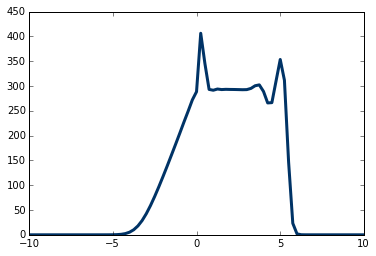

In [27]:
#vv=numpy.zeros(81)
#for i in range(81):
#      vv[i]=vel[49,i]

vv = vel[49,:]

print(vv) 

plt.plot(x, vv, color='#003366', ls='-', lw=3) 

In [28]:
den=a[0]
print(den.shape)
print(den)
timeden=den[-1,steps+1]
print(timeden)


    
#plt.plot(x, dd, color='#003366', ls='-', lw=3) 

(51, 81)
[[ 1.     1.     1.    ...,  0.125  0.125  0.125]
 [ 1.     1.     1.    ...,  0.125  0.125  0.125]
 [ 1.     1.     1.    ...,  0.125  0.125  0.125]
 ..., 
 [ 1.     1.     1.    ...,  0.125  0.125  0.125]
 [ 1.     1.     1.    ...,  0.125  0.125  0.125]
 [ 1.     1.     1.    ...,  0.125  0.125  0.125]]
0.374691402648


In [29]:
def dot(a,b):    
    length=len(a)
    result=numpy.zeros(length)
    for i in range(length): 
        result[i]=a[i]*b[i]
    return result


In [47]:
rhoet=a[2]
print(rhoet.shape)
print(rhoet)
RET=rhoet[-1,steps+1]
print(RET)
u=292.611471527
den=0.374691402648
pressure=(RET/den-0.5*u**2)*0.4*den
print(pressure)


(51, 81)
[[ 250000.  250000.  250000. ...,   25000.   25000.   25000.]
 [ 250000.  250000.  250000. ...,   25000.   25000.   25000.]
 [ 250000.  250000.  250000. ...,   25000.   25000.   25000.]
 ..., 
 [ 250000.  250000.  250000. ...,   25000.   25000.   25000.]
 [ 250000.  250000.  250000. ...,   25000.   25000.   25000.]
 [ 250000.  250000.  250000. ...,   25000.   25000.   25000.]]
91668.0403769
30250.8901676


In [40]:
left=(0.4*uu3-0.2*dot(uu2,uu2))

12838.0792442


In [ ]:
v=a[0]
print(v.shape)
step=0.01/dt
step=int(step)
print(step)


vv=v[50,:]
print(vv.shape)
print(vv)
plt.plot(x, vv, color='#003366', ls='-', lw=3)

In [ ]:
def dot(a,b):    
    length=len(a)
    result=numpy.zeros(length)
    for i in range(length): 
        result[i]=a[i]*b[i]
    return result


In [ ]:
a=[1,2,3,4,5,6]
aa=dot(a,a)
print(aa)
#print(a[0:2])
#print(a[2:5])

In [ ]:
u3=a[2]
left=(0.4*u3-0.2*dot(u2,u2))
print(left)
right=a[0]
print(right)

pressure=dot(left,right)

In [ ]:
u1=[1,1]
u2=[2,2]
u3=[3,3]
b=computeF2(u1,u2,u3)
print(b)
c=computeF3(u1,u2,u3)
print(c)

In [ ]:
def computeF1(u1,u2,u3):
    
    length=len(u1)
    result=numpy.zeros(length)
    for i in range(length):   

        result[i]=u1[i]+u2[i]+u3[i]
        print(i)      
     
    return result


u1=[1,1]
u2=[2,2]
u3=[3,3]
b=computeF1(u1,u2,u3)
print(b)
#u2=[1,3]
#print(computeF1(u1))

In [ ]:
u1=[1,2,3]
print(len(u1))

In [ ]:
a=[1,2,3,4,5,6,7]
print(a)
print(a[0:4])
print(a[4:7])

In [ ]:
def computeF1(u1,u2,u3): 

             
     
    return u1,u2


u1=[1,1]
u2=[2,2]
u3=[3,3]
b=computeF1(u1,u2,u3)
print(b[1])

In [ ]:
u1=[1,1]
u2=[2,2]
u3=[3,3]

In [ ]:
u=[u1,u2,u3]
print(u[1])